In [1]:
# For Data Analysis
import pandas as pd
import numpy as np



In [2]:
#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [3]:
#For text processing and Sentimental Analysis
from nltk.stem import WordNetLemmatizer
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import spacy
from textblob import TextBlob

In [4]:
df = pd.read_csv('Swiggy Dataset - Sheet1.csv')

In [5]:
df.head(5)

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"61,959,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"143,284,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"143,284,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"830,340,000,000,000,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"143,284,383"


# EDA

In [6]:
#Type cast date column to datatime
df['date'] = pd.to_datetime(df['date'])

In [7]:
#Columns present
df.columns

Index(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id'],
      dtype='object')

In [8]:
df.shape

(16712, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             16712 non-null  datetime64[ns]
 1   favorite_count   16712 non-null  int64         
 2   followers_count  16712 non-null  int64         
 3   friends_count    16712 non-null  int64         
 4   full_text        16712 non-null  object        
 5   retweet_count    16712 non-null  int64         
 6   retweeted        14384 non-null  object        
 7   screen_name      16712 non-null  object        
 8   tweet_id         16712 non-null  object        
 9   user_id          16712 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 1.3+ MB


In [10]:
df.dtypes

date               datetime64[ns]
favorite_count              int64
followers_count             int64
friends_count               int64
full_text                  object
retweet_count               int64
retweeted                  object
screen_name                object
tweet_id                   object
user_id                    object
dtype: object

In [11]:
# Number of Null Values
df.isnull().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [12]:
# Number of retweet by Screen name
df.groupby(['screen_name']).sum()['retweet_count'].sort_values(ascending=False)

screen_name
Ibleed_sarcasm     487
DhooDala            64
BeautifulBluru      38
RoadsOfMumbai       37
TOIBengaluru        34
                  ... 
Shashvat_dixit       0
Shashivem1           0
ShashiKumarRaw2      0
Shashi66240684       0
zykash               0
Name: retweet_count, Length: 8617, dtype: int64

In [13]:
# Number of tweets by user name
df.groupby(['screen_name']).size().sort_values(ascending=False)

screen_name
SandipThink        71
SwiggyCares        70
Vineeta75481990    53
bachPunn           53
zomatocare         45
                   ..
VidyaSharma2601     1
VidhataN            1
Vickymbahr          1
Vibrantcafe1        1
zykash              1
Length: 8617, dtype: int64

In [14]:
#Monthe wise tweet
df['month']= pd.DatetimeIndex(df['date']).month

<AxesSubplot:xlabel='month'>

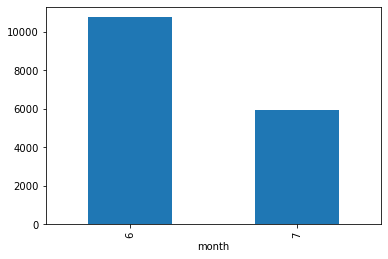

In [15]:
df.groupby(['month']).count()['full_text'].plot(kind='bar')

# Text cleaning and processing

In [16]:
#Remove punctuation:

def no_http(text):
    wo_http = re.sub(r"(@\[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    return wo_http

In [17]:
df['full_text'] = df["full_text"].apply(lambda x : no_http(x))

In [18]:
df['full_text']

0         Mahi       swiggy in The ultimate answer will...
1                                   SwiggyCares I hope so 
2         SwiggyCares I think you have the order detail...
3         swiggy in People are complaining here also  i...
4         SwiggyCares Do you even know the meaning of y...
                               ...                        
16707     SwiggyCares they said as delivery box is not ...
16708     swiggy in Deliver to karta nahi  install kyo ...
16709     swiggy in thanks for spilling my drink  I wai...
16710     SwiggyCares hello there i use swigggy regular...
16711     Being Humor  ZomatoIN  swiggy in can you help...
Name: full_text, Length: 16712, dtype: object

In [19]:
def no_punct(text):
    wo_punct = "".join([x for x in text if x not in string.punctuation])
    return wo_punct

In [20]:
df['full_text'] = df["full_text"].apply(lambda x : no_punct(x))

In [21]:
df["full_text"]

0         Mahi       swiggy in The ultimate answer will...
1                                   SwiggyCares I hope so 
2         SwiggyCares I think you have the order detail...
3         swiggy in People are complaining here also  i...
4         SwiggyCares Do you even know the meaning of y...
                               ...                        
16707     SwiggyCares they said as delivery box is not ...
16708     swiggy in Deliver to karta nahi  install kyo ...
16709     swiggy in thanks for spilling my drink  I wai...
16710     SwiggyCares hello there i use swigggy regular...
16711     Being Humor  ZomatoIN  swiggy in can you help...
Name: full_text, Length: 16712, dtype: object

In [22]:
#Tokenize:
token = RegexpTokenizer(r'\w+')

In [23]:
df['full_text'] = df["full_text"].apply(lambda x : token.tokenize(x.lower()))

In [24]:
df['full_text']

0        [mahi, swiggy, in, the, ultimate, answer, will...
1                               [swiggycares, i, hope, so]
2        [swiggycares, i, think, you, have, the, order,...
3        [swiggy, in, people, are, complaining, here, a...
4        [swiggycares, do, you, even, know, the, meanin...
                               ...                        
16707    [swiggycares, they, said, as, delivery, box, i...
16708    [swiggy, in, deliver, to, karta, nahi, install...
16709    [swiggy, in, thanks, for, spilling, my, drink,...
16710    [swiggycares, hello, there, i, use, swigggy, r...
16711    [being, humor, zomatoin, swiggy, in, can, you,...
Name: full_text, Length: 16712, dtype: object

In [25]:
#Remove stop words
stop_me = stopwords.words("english")
def stop_words(text):
    words = [x for x in text if x not in stop_me]
    return words

In [26]:
df['full_text'] = df['full_text'].apply(lambda x :stop_words(x))

In [27]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
def Word_lemmat(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

In [28]:
df['full_text'] = df['full_text'].apply(lambda x : Word_lemmat(x))

# Sentiment Analysis

In [29]:
#Measure the Subjectivity of the tweet
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
df['tweet_subjectivity'] = df['full_text'].apply(getsubjectivity)

In [30]:
#Measure the Polarity of the tweet
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
df['tweet_Polarity'] = df['full_text'].apply(getpolarity)

In [31]:
def getanalysis(score):
    if score < 0:
        return 'Negative'
    if score == 0:
        return 'Neutral'
    if score > 0:
        return 'Positive'
df['Tweet_analysis'] = df['tweet_Polarity'].apply(getanalysis)

In [32]:
df

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id,month,tweet_subjectivity,tweet_Polarity,Tweet_analysis
0,2019-07-18 22:47:00,0,82,219,mahi swiggy ultimate answer b sorry assure,0,False,syamantak1,1,"61,959,419",7,1.000000,-0.250000,Negative
1,2019-07-18 22:43:00,0,102,129,swiggycares hope,0,False,Bharatbbhushn,2,"143,284,383",7,0.000000,0.000000,Neutral
2,2019-07-18 22:37:00,0,102,129,swiggycares think order detail number present ...,0,False,Bharatbbhushn,3,"143,284,383",7,0.267857,0.142857,Positive
3,2019-07-18 22:35:00,0,13,16,swiggy people complaining also know little dis...,0,False,taifkhalid01,4,"830,340,000,000,000,000",7,0.625000,0.010417,Positive
4,2019-07-18 22:25:00,0,102,129,swiggycares even know meaning tagline dm work ...,0,False,Bharatbbhushn,5,"143,284,383",7,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,2019-07-11 12:13:00,0,0,2,swiggycares said delivery box ready deliver ca...,0,False,UmmeMohammad18,"16,708","1,144,990,000,000,000,000",7,0.750000,0.150000,Positive
16708,2019-07-11 12:12:00,0,106,146,swiggy deliver karta nahi install kyo karen,0,False,Desi_Life1,"16,709","1,039,410,000,000,000,000",7,0.000000,0.000000,Neutral
16709,2019-07-11 12:11:00,0,91,248,swiggy thanks spilling drink waited call infor...,0,False,Pinks_Forever_,"16,710","1,700,914,573",7,0.200000,-0.150000,Negative
16710,2019-07-11 12:11:00,0,0,2,swiggycares hello use swigggy regularly order ...,0,False,UmmeMohammad18,"16,711","1,144,990,000,000,000,000",7,0.076923,0.000000,Neutral


# Visualisation

<AxesSubplot:ylabel='Tweet_analysis'>

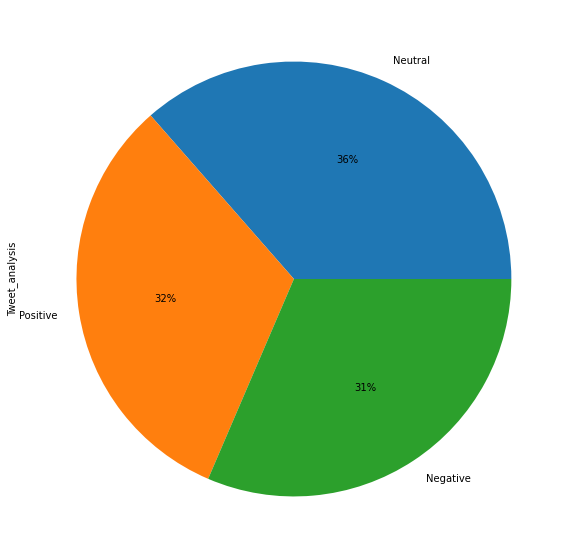

In [33]:
# Creat piechart for tweet analysis
plt.figure(figsize=(12,10))
df['Tweet_analysis'].value_counts().plot(kind='pie',autopct='%1.0f%%')

# The output shows that 31% of the overall tweets are negative while 36% and 32% are respectively neutral and positive.

<AxesSubplot:xlabel='Tweet_analysis', ylabel='count'>

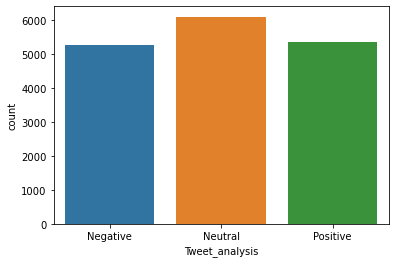

In [34]:
sns.countplot(x='Tweet_analysis', data=df)

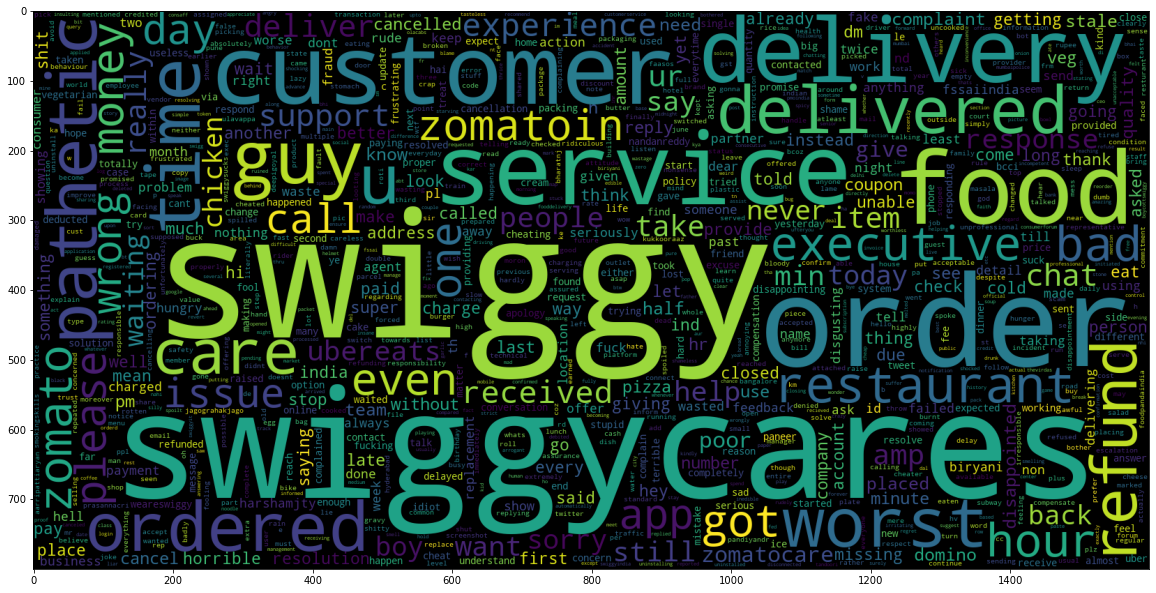

In [35]:
#Wordcloud for negative words
plt.figure(figsize=(20,20))
data = df[df['Tweet_analysis']=='Negative']['full_text']
wc = WordCloud(max_words=1000, width= 1600, height = 800, collocations= False).generate(' '.join(data))
plt.imshow(wc)

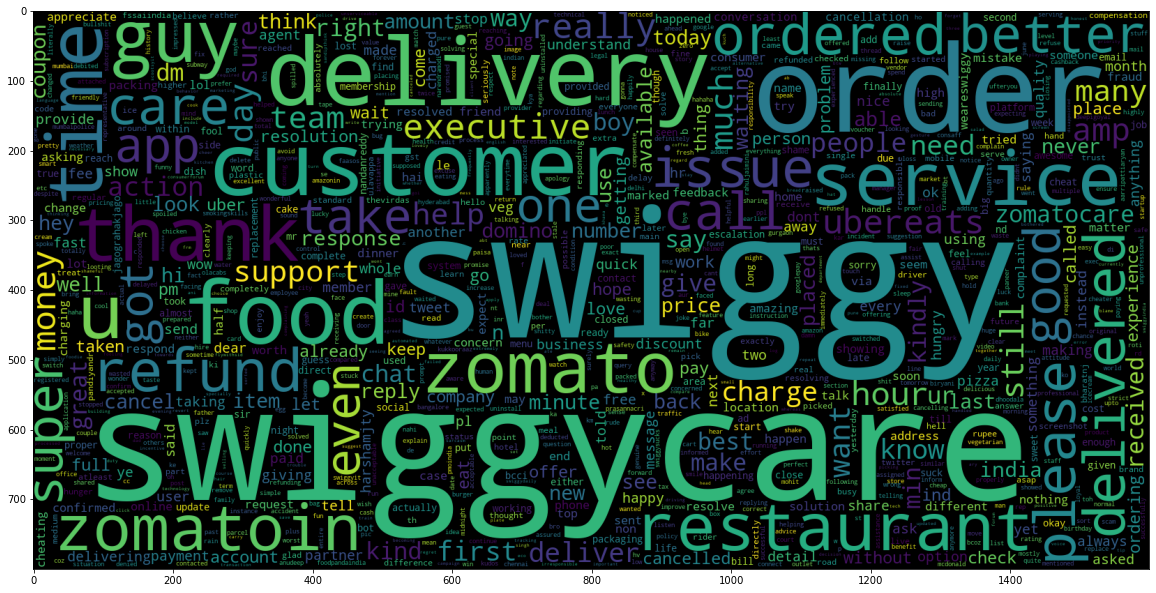

In [36]:
#Wordcloud for positive words
plt.figure(figsize=(20,20))
data_pos = df[df['Tweet_analysis']=='Positive']['full_text']
wc = WordCloud(max_words=1000, width= 1600, height = 800, collocations= False).generate(' '.join(data_pos))
plt.imshow(wc)

<AxesSubplot:xlabel='month,Tweet_analysis'>

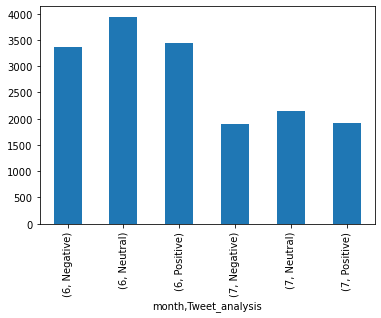

In [37]:
#Monthe wise tweet
df.groupby(['month','Tweet_analysis']).size().plot(kind='bar')

In [38]:
# Team need take action for the Negative tweets to improve the brand values.

In [39]:
df[df['Tweet_analysis']=='Negative']['full_text']

0               mahi swiggy ultimate answer b sorry assure
12       swiggycares swiggy know swiggy getting worst d...
14       swiggy swiggycares zomato along foreign fund t...
18                                   swiggycares u mean dm
30       swiggy service giving customer u also started ...
                               ...                        
16697    continuing previous tweet swiggy swiggycares s...
16698    swiggycares reply frustrating service refunded...
16700    swiggy swiggycares order terrible food bad tas...
16703    katie abraham swiggycares customer care direct...
16709    swiggy thanks spilling drink waited call infor...
Name: full_text, Length: 5256, dtype: object